In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import io
from google.colab import files

from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import Adam
from keras.layers.core import Dropout
from keras.callbacks import EarlyStopping, LearningRateScheduler

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score

In [ ]:
uploaded = files.upload()

Saving BandGap1_10000.csv to BandGap1_10000.csv


In [ ]:
df = pd.read_csv(io.BytesIO(uploaded['BandGap1_10000.csv']))

In [ ]:
df

,c2,s,BandGap1
0,0.15,0.01,3.255800e-02
1,0.30,0.01,2.749700e-02
2,0.45,0.01,2.075500e-02
3,0.60,0.01,1.433700e-02
4,0.75,0.01,8.508700e-03
...,...,...,...
9995,14.40,1.00,1.780000e-14
9996,14.55,1.00,1.820000e-14
9997,14.70,1.00,3.110000e-14
9998,14.85,1.00,2.180000e-14


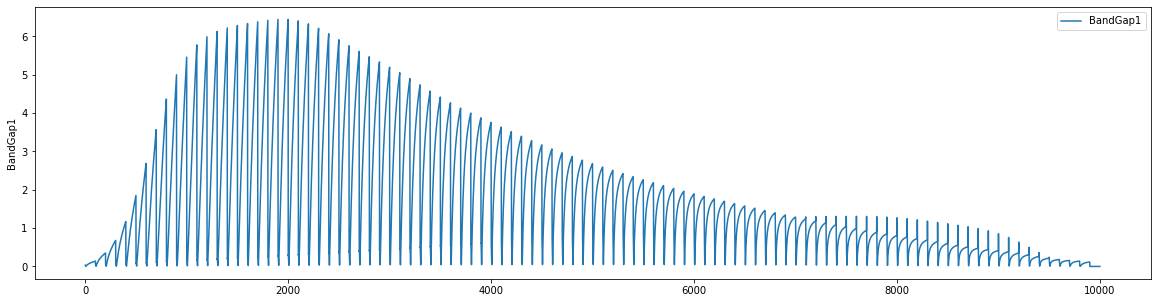

In [ ]:
df.plot(y='BandGap1', figsize=(20, 5))
plt.ylabel('BandGap1')
plt.show()

In [ ]:
# データの分割
(train, test) = train_test_split(df, test_size=0.3, shuffle=True)

# pythonでは1行目を0行目と数える. x_trainではcsvファイルの1行目から２行目を，y_trainでは3行目のデータを活用
x_train = train.iloc[:, [0, 1]]
y_train = train.iloc[:, [2]]

x_test = test.iloc[:, [0, 1]]
y_test = test.iloc[:, [2]]

In [ ]:
# モデルの構築
# inputの数:c2, s
n_in = 2

# ノードの数
n_hidden = 64

# outputの数:BandGap
n_out = 1

# 学習回数
epochs = 100
batch_size = 32

model = Sequential()
model.add(Dense(n_hidden, activation= 'relu', input_dim=n_in))
model.add(Dense(n_hidden, activation= 'relu', input_dim=n_in))
model.add(Dense(n_hidden, activation= 'relu', input_dim=n_in))
model.add(Dense(n_hidden, activation= 'relu', input_dim=n_in))
model.add(Dense(n_hidden, activation= 'relu', input_dim=n_in))
model.add(Dense(units=n_out))
model.summary()

optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999)
model.compile(loss='mean_squared_error', optimizer=optimizer)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 64)                192       
                                                                 
 dense_7 (Dense)             (None, 64)                4160      
                                                                 
 dense_8 (Dense)             (None, 64)                4160      
                                                                 
 dense_9 (Dense)             (None, 64)                4160      
                                                                 
 dense_10 (Dense)            (None, 64)                4160      
                                                                 
 dense_11 (Dense)            (None, 1)                 65        
                                                                 
Total params: 16,897
Trainable params: 16,897
Non-trai

In [ ]:
 # 学習オプション
history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_test, y_test))

Epoch 1/100
219/219 [==============================] - 1s 3ms/step - loss: 1.3988 - val_loss: 0.5042
Epoch 2/100
219/219 [==============================] - 1s 3ms/step - loss: 0.4095 - val_loss: 0.1475
Epoch 3/100
219/219 [==============================] - 1s 3ms/step - loss: 0.1393 - val_loss: 0.0940
Epoch 4/100
219/219 [==============================] - 1s 3ms/step - loss: 0.1092 - val_loss: 0.0910
Epoch 5/100
219/219 [==============================] - 1s 3ms/step - loss: 0.0612 - val_loss: 0.0388
Epoch 6/100
219/219 [==============================] - 1s 3ms/step - loss: 0.0178 - val_loss: 0.0115
Epoch 7/100
219/219 [==============================] - 1s 3ms/step - loss: 0.0194 - val_loss: 0.0487
Epoch 8/100
219/219 [==============================] - 1s 3ms/step - loss: 0.0589 - val_loss: 0.0169
Epoch 9/100
219/219 [==============================] - 1s 3ms/step - loss: 0.0540 - val_loss: 0.0137
Epoch 10/100
219/219 [==============================] - 1s 3ms/step - loss: 0.0337 - val_lo

In [ ]:
test_predict = model.predict(x_test)

94/94 [==============================] - 0s 1ms/step


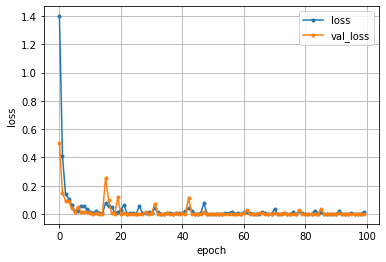

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = len(loss)
plt.plot(range(epochs), loss, marker='.', label='loss')
plt.plot(range(epochs), val_loss, marker='.', label='val_loss')
plt.legend(loc='best')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [ ]:
# MAE
test_MAE = mean_absolute_error(y_test, test_predict)
print('MAE：', test_MAE)

# MSE
test_MSE = mean_squared_error(y_test, test_predict)
print('MSE：', test_MSE)

# RMSE
test_RMSE = sqrt(mean_squared_error(y_test, test_predict))
print('RMSE：', test_RMSE)

# 決定係数
R2 = r2_score(y_test, test_predict)
print('R2：', R2)

# MAEに対するRMSEの比
print('RMSE/MAE：', test_RMSE / test_MAE)

MAE： 0.02345854542942008
MSE： 0.0009945919616792336
RMSE： 0.0315371520857422
R2： 0.9995863700272349
RMSE/MAE： 1.3443779871445265


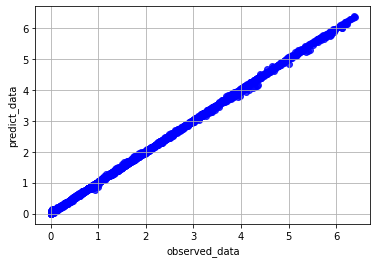

In [ ]:
plt.figure()
plt.scatter(y_test, test_predict, c='blue', alpha=0.8)
plt.ylim(plt.ylim())
plt.xlabel('observed_data')
plt.ylabel('predict_data')
plt.grid()
plt.show()

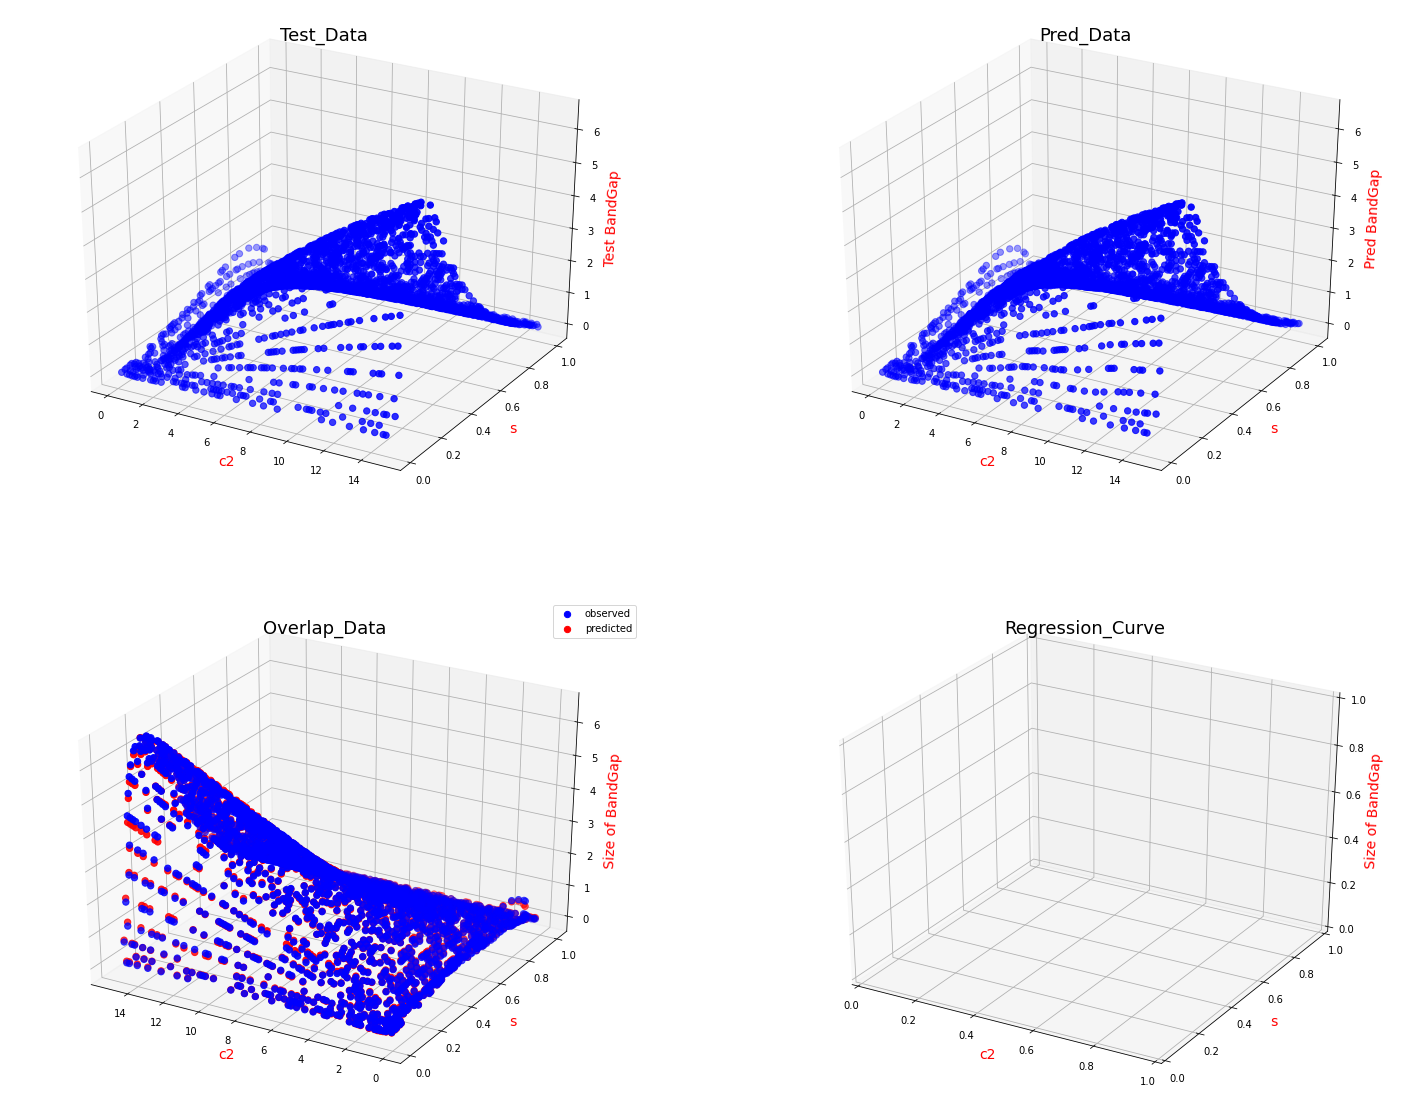

In [ ]:
# Figureを追加
fig = plt.figure(figsize = (25, 20))

# 3DAxesを追加
ax1 = fig.add_subplot(2, 2, 1, projection='3d')
ax2 = fig.add_subplot(2, 2, 2, projection='3d')
ax3 = fig.add_subplot(2, 2, 3, projection='3d')
ax4 = fig.add_subplot(2, 2, 4, projection='3d')

# Axesのタイトルを設定
ax1.set_title("Test_Data", size = 18)
ax2.set_title("Pred_Data", size = 18)
ax3.set_title("Overlap_Data", size = 18)
ax4.set_title("Regression_Curve", size = 18)

# 軸ラベルを設定
ax1.set_xlabel("c2", size = 14, color = "r")
ax1.set_ylabel("s", size = 14, color = "r")
ax1.set_zlabel("Test BandGap", size = 14, color = "r")
ax2.set_xlabel("c2", size = 14, color = "r")
ax2.set_ylabel("s", size = 14, color = "r")
ax2.set_zlabel("Pred BandGap", size = 14, color = "r")
ax3.set_xlabel("c2", size = 14, color = "r")
ax3.set_ylabel("s", size = 14, color = "r")
ax3.invert_yaxis()
ax3.set_zlabel("Size of BandGap", size = 14, color = "r")
ax4.set_xlabel("c2", size = 14, color = "r")
ax4.set_ylabel("s", size = 14, color = "r")
ax4.set_zlabel("Size of BandGap", size = 14, color = "r")

# x,y,zに要素追加
x = x_test.iloc[:, [0]]
y = x_test.iloc[:, [1]]
z1 = y_test
z2 = test_predict

# 散布図
ax1.scatter(x, y, z1, s = 40, c = "blue")
ax2.scatter(x, y, z2, s = 40, c = "blue")
ax3.scatter(x, y, z1, s = 40, c = "blue")
ax3.scatter(x, y, z2, s = 40, c = "red")

ax3.legend(["observed", "predicted"])

plt.show()

In [ ]:
C2, S = map(float, input().split())
z_ex = rbf(C2, S)
print("Predict：", z_ex)

15 0.19
Predict： 6.117686696702555


In [ ]:
x = np.reshape(x, x.size)
y = np.reshape(y, y.size)

In [ ]:
x = x.values # xをデータフレーム型からnp.array型へ変換。
y = y.values # yをデータフレーム型からnp.array型へ変換。

In [ ]:
print(type(x))
print(type(y))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [ ]:
z = test_predict

In [ ]:
# np.array型から一次元配列に変換
x = x.flatten()
y = y.flatten()
z = z.flatten()

*Result************
z = A * 1/sqrt(2*pi*sigma_x^2) * exp(-(x-mu_x)^2/(2*sigma_x^2)) * 1/sqrt(2*pi*sigma_y^2) * exp(-(y-mu_y)^2/(2*sigma_y^2))
A =  51.397212911103814 +- 1.1091254505800034
sigma_x =  6.7927784565431955 +- 0.12071608596347137
sigma_y =  0.23310409469436516 +- 0.0019336194555232313
mu_x =  13.708210146724852 +- 0.1603676587023312
mu_y =  0.27913656996107816 +- 0.0017448458685938412
*******************


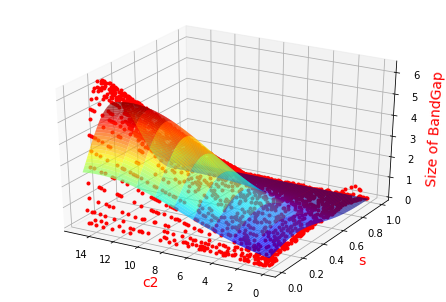

<Figure size 432x288 with 0 Axes>

In [ ]:
#twoD_Gauss_fitting.py
 
from mpl_toolkits.mplot3d import Axes3D
from scipy.optimize import curve_fit
from scipy import stats
 
def fitting_2DGauss(data):
    def two_D_gauss(X, A, sigma_x, sigma_y, mu_x, mu_y): # 2D Gaussian
        x, y = X #説明変数(独立変数)を分離する。
        z = A * 1/(np.sqrt(2*np.pi*sigma_x**2))*np.exp(-(x-mu_x)**2/(2*sigma_x**2)) * 1/(np.sqrt(2*np.pi*sigma_y**2))*np.exp(-(y-mu_y)**2/(2*sigma_y**2))
 
        return z
 
    def plot_fit_result(data, fit_result):
        #グラフの枠を作っていく
        fig = plt.figure()
        ax = Axes3D(fig)
 
        #描画
        ax.plot(data["x"],data["y"],data["z"], ms=3, marker="o",linestyle='None', c="red")         #実測データ値は散布図でplot
        ax.set_xlabel("c2", size = 14, color = "r")
        ax.set_ylabel("s", size = 14, color = "r")
        ax.set_zlabel("Size of BandGap", size = 14, color = "r")
        ax.invert_yaxis()

        ax.plot_surface(fit_result["x"],fit_result["y"],fit_result["z"], rstride=1, cstride=10, cmap='jet', alpha=0.7)  #fitting結果は面(ワイヤーフレーム)でplot
        plt.show(block=False)                                                                       #グラフを表示
        plt.savefig("twoD_Gauss_fitting_result.png", dpi=300)                                       #グラフを画像データで保存
        return 0
 
    x_observed = data["x"]
    y_observed = data["y"]
    z_observed = data["z"]
 
    #fittingのメイン計算部分
    popt, pcov = curve_fit(two_D_gauss, (x_observed, y_observed), z_observed) #poptは最適推定値、pcovは共分散が出力される
    perr = np.sqrt(np.diag(pcov)) #推定されたパラメータの各々の誤差
 
 
    #fittingの結果をターミナルに表示
    print("*Result************")
    print("z = A * 1/sqrt(2*pi*sigma_x^2) * exp(-(x-mu_x)^2/(2*sigma_x^2)) * 1/sqrt(2*pi*sigma_y^2) * exp(-(y-mu_y)^2/(2*sigma_y^2))")
    print("A = ", popt[0], "+-", perr[0])
    print("sigma_x = ", popt[1], "+-", perr[1])
    print("sigma_y = ", popt[2], "+-", perr[2])
    print("mu_x = ", popt[3], "+-", perr[3])
    print("mu_y = ", popt[4], "+-", perr[4])
    print("*******************")
 
    #グラフ用に、fittingの結果を示す曲面を作成
    fit_x = np.linspace(min(data["x"]), max(data["x"]), 100)
    fit_y = np.linspace(min(data["y"]), max(data["y"]), 100)
    X, Y = np.meshgrid(fit_x, fit_y)
    fit_z = two_D_gauss((X, Y), popt[0], popt[1], popt[2], popt[3], popt[4])
    fit_result={"x":X, "y":Y, "z":fit_z}
 
    #グラフでfitting結果を表示
    plot_fit_result(data, fit_result)
 
    return popt[0], popt[1], popt[2], popt[3], popt[4]
 
if __name__=="__main__":
 
    #入力データ(観測データ)
    data={  "x": x,
            "y": y,
            "z": z
            }
 
    #fittingを行う関数の読み出し
    A, sigama_x, sigma_y, mu_x, mu_y = fitting_2DGauss(data)
 